In [27]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt

In [28]:
def euler(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Euler.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """
    return x + dt*f(x,t,p)

In [29]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [30]:
def integrador_ode(m,f,x0,a,b,k,p):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q        
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
    return t,x

## Redes Neuronales: Practico 1
---------
### Primera Parte

Tenemos la ecucacion  diferencial del modelo integrate and fire 
$$
\frac{dV_m(t)}{dt}=\frac{1}{\tau_m}(E_L-V_m(t)+R_mI_e(t))
$$
con 
$$
\tau_m=10\:ms\\
E_L=-65\:mV\\
R_m=10\:M\Omega
$$
y $I_e(t)$ una corriente electrica externa

A. Graficar la ecuacion diferencial y analizar la dinamica incluso para tiempos largos para $I_e(t)=0$

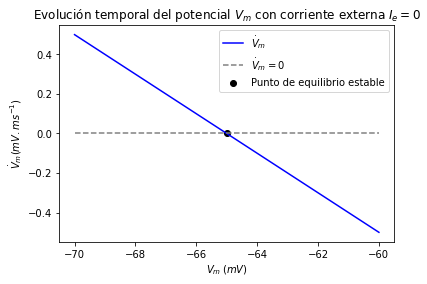

In [6]:
def dV(V):
    tau=10.0
    El=-65.0
    Rm=10.0
    Ie=0.0
    return (El-V+Rm*Ie)/tau

V=np.linspace(-70,-60,100)
plt.title("Evolución temporal del potencial $V_m$ con corriente externa $I_e=0$")
plt.xlabel(r'$V_m\:(mV)$')
plt.ylabel(r'$\dot{V}_m(mV.ms^{-1})$')
plt.plot(V,dV(V),color='blue',linestyle='solid',label=r'$\dot{V}_m$')
plt.plot(V,np.zeros(100), color='grey',linestyle='dashed',label=r'$\dot{V}_m=0$')
plt.scatter(-65.0,0.0,color='black',marker='o',edgecolors='black',linewidth=1,label='Punto de equilibrio estable') 
plt.legend()
plt.show
plt.savefig("Ie_nula.pdf")

Para valores iniciales del potencial menores al potencial de reposo, la neurona va aumentando su potencial cada vez mas lentamente hasta llegar al valor del potencial de reposo, y para valores inciciales mayores a este el potencial disminuye su potencial cada vez mas lentamente hasta llegar al valor de reposo. O sea, para tiempos largos la neurona se encontra con su potencial en el valor de reposo.

B. Graficar la ecuacion diferencial para el caso en que $I_e(t)=2\:nA$.  

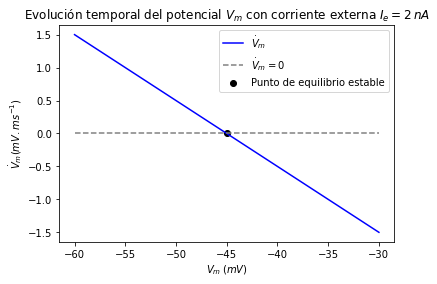

In [7]:
def dv(V):
    tau=10.0
    El=-65.0
    Rm=10.0
    Ie=2.0
    #RmIe=20000.0
    return (El-V+Rm*Ie)/tau

V=np.linspace(-60,-30,100)
plt.title("Evolución temporal del potencial $V_m$ con corriente externa $I_e=2\:nA$")
plt.xlabel(r'$V_m\:(mV)$')
plt.ylabel(r'$\dot{V}_m(mV.ms^{-1})$')
plt.plot(V,dv(V),color='blue',linestyle='solid',label=r'$\dot{V}_m$')
plt.plot(V,np.zeros(100), color='grey',linestyle='dashed',label=r'$\dot{V}_m=0$')
plt.scatter(-45,0.0,color='black',marker='o',edgecolors='black',linewidth=1,label='Punto de equilibrio estable') 
plt.legend()
plt.show
plt.savefig("Ie_2.pdf")

La neurona se comporta de forma similar al caso anterior, solo que esta vez su punto de equilibrio no se encuentra en el potencial de reposo sino en $V_m=E_L+R_mI_e$ que en este caso se da para $V_m=-45\:mV$

C. La solucion a la ecuacion diferencial estara dada por 
$$
V_m(t)=(E_L+R_mI_e)(1-e^\frac{-t}{\tau})+V_0e^\frac{-t}{\tau}
$$

D. Graficar la solucion exacta para $0\:ms\leq t\leq 200\:ms,\:I_e=2nA=,\:V_0=E_L=-65\:mV$

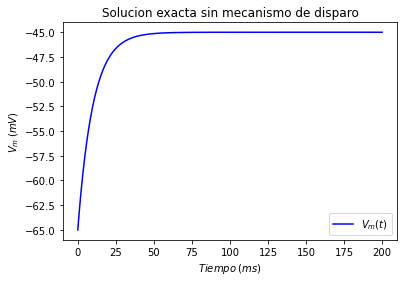

In [8]:
def V_m(t):
    E_l=-65.0
    R_m=10.0
    I_e=2.0
    V0=-65.0
    tau=10.0
    return (E_l+R_m*I_e)*(1-np.exp(-t/tau))+V0*np.exp(-t/tau)

t=np.linspace(0,200,1000)
plt.title("Solucion exacta sin mecanismo de disparo")
plt.xlabel(r'$Tiempo\:(ms)$')
plt.ylabel(r'$V_m\:(mV)$')
plt.plot(t,V_m(t),color='blue',linestyle='solid',label=r'$V_m(t)$')
#plt.plot(t,np.zeros(100), color='grey',linestyle='dashed',label=r'$V_m=0$')
#plt.scatter(19935,0.0,color='black',marker='o',edgecolors='black',linewidth=1,label='Punto de equilibrio estable') 
plt.legend()
plt.show
plt.savefig("exacta.pdf")

E. Resolver la ecuacion del modelo utilizando Runge-Kutta de cuarto orden con los valores anteriores para los parametros y la misma condicion inicial en el mismo intervalo que en el punto anterior y con $h=0.05\:ms$

In [9]:
m=rk4
V0=[-65]
a=0.0
b=200.0
#h=0.05 entonces k=200/0.05=4000
k=4000
p=0.0

def dV(V,t,p):
    tau=10.0
    El=-65.0
    Rm=10.0
    Ie=2.0
    #RmIe=20000.0
    return (El-V+Rm*Ie)/tau

t_aprox, V_aprox = integrador_ode(m,dV,V0,a,b,k,p)

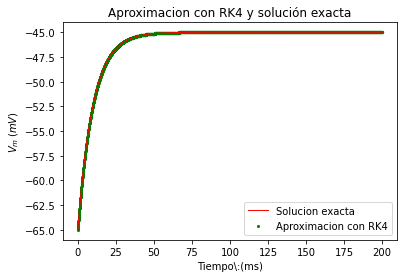

In [10]:
def V_m(t):
    E_l=-65.0
    R_m=10.0
    I_e=2.0
    V0=-65.0
    tau=10.0
    return (E_l+R_m*I_e)*(1-np.exp(-t/tau))+V0*np.exp(-t/tau)

t=np.linspace(0.0,200.0,1000)
plt.title("Aproximacion con RK4 y solución exacta")
plt.xlabel("Tiempo\:(ms)")
plt.ylabel(r'$V_m\:(mV)$')
plt.scatter(t_aprox,V_aprox,label="Aproximacion con RK4",color="green",marker=".",linewidth=0.1)
plt.plot(t,V_m(t),label="Solucion exacta",color='red',linestyle='solid',linewidth=1)
plt.legend()
plt.savefig("exacta_rk4.pdf")
plt.show()

---------------

### Segunda parte
Ahora tengo que agregar el mecanismo de disparo: si la neurona sobrepasa un valor umbral $ V_{um}=-50\:mV $, el valor de $ V_m $ debe restituirse al potencial de reposo $ E_L=-65\:mV $.

F.

In [31]:
def integrador_ode_disparo(m,f,x0,a,b,k,p):
    assert k>0
    Vum=-50.0
    El=-65.0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
        if x[:,j+1] > Vum:
           x[:,j+1] = El
    return t,x

In [32]:
m=rk4
V0=[-65]
a=0.0
b=200.0
#h=0.05 entonces k=200/0.05=4000
k=4000
p=0.0

def dV(V,t,p):
    tau=10.0
    El=-65.0
    Rm=10.0
    Ie=2.0
    #RmIe=20000.0
    return (El-V+Rm*Ie)/tau

t_aprox, V_aprox = integrador_ode_disparo(m,dV,V0,a,b,k,p)

In [33]:
t_aprox, V_aprox

(array([0.0000e+00, 5.0000e-02, 1.0000e-01, ..., 1.9990e+02, 1.9995e+02,
        2.0000e+02]),
 array([[-65.        , -64.90024958, -64.80099667, ..., -56.77209939,
         -56.7133858 , -56.65496505]]))

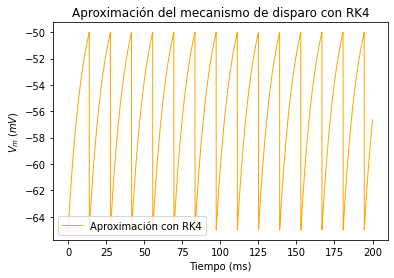

In [36]:
plt.title("Aproximación del mecanismo de disparo con RK4")
plt.xlabel("Tiempo (ms)")
plt.ylabel(r'$V_m\:(mV)$')
plt.plot(t_aprox,V_aprox[0],label="Aproximación con RK4",color="orange",linestyle="-",linewidth=1)
plt.legend()
plt.savefig("disparo_Ie_constante")
plt.show()

G. Repetir el punto anterior pero con $I_e(t)=I_0\cos(\frac{t}{30})\:,\:I_0=2.5\:nA$

In [17]:
m=rk4
V0=[-65]
a=0.0
b=800.0
#h=0.05 entonces k=200/0.05=4000
k=16000
p=0.0

def dV(V,t,p):
    tau=10.0
    El=-65.0
    Rm=10.0
    Ie=2.5*np.cos(t/30.0)
    #RmIe=20000.0
    return (El-V+Rm*Ie)/tau

t_aprox, V_aprox = integrador_ode_disparo(m,dV,V0,a,b,k,p)

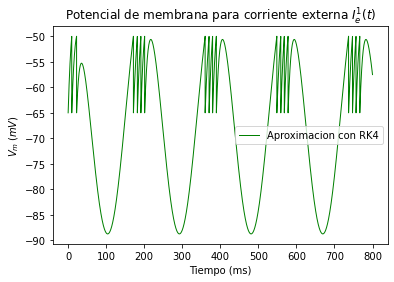

In [18]:
plt.title("Potencial de membrana para corriente externa $I_e^1(t)$")
plt.xlabel("Tiempo (ms)")
plt.ylabel(r'$V_m\:(mV)$')
plt.plot(t_aprox,V_aprox[0],label="Aproximacion con RK4",color="green",linestyle="-",linewidth=1)
plt.legend()
plt.savefig("disparo_Ie1.pdf")
plt.show()

H. Calculamos analiticamente la frecuencia de disparo. Queremos ver 

$$
V_m(t+\Delta t)=(E_L+R_mI_e)(1-e^{\frac{-t}{\tau}}e^{\frac{-\Delta t}{\tau}})+V_0e^{\frac{-t}{\tau}}e^{\frac{-\Delta t}{\tau}}=V_{um}\\
\Rightarrow e^{\frac{-t}{\tau}}e^{\frac{-\Delta t}{\tau}}(-E_L-R_mI_e+V_0)=V_{um}-E_L-R_mI_e\\
e^{\frac{-t}{\tau}}e^{\frac{-\Delta t}{\tau}}=\frac{V_{um}-E_L-R_mI_e}{V_0-E_L-R_mI_e}\\
\frac{-t}{\tau}-\frac{\Delta t}{\tau}=\:ln\bigg(\frac{V_{um}-E_L-R_mI_e}{V_0-E_L-R_mI_e}\bigg)\\
\Delta t=\tau\:ln\bigg(\frac{V_0-E_L-R_mI_e}{V_{um}-E_L-R_mI_e}\bigg)-t
$$
Este $\Delta t$ es el tiempo que la neurona demorara en llegar al valor de umbral a partir de un $t$ arbitrario. En este caso, tenemos que nuestro $t$ inicial es $t=0$ y ademas $V_m(0)=V_0=E_L$ por lo que $\Delta t$ sera equivalente al período de disparo, y la frecuencia de disparo $\nu$ será $\nu=\frac{1}{\Delta t}$. Para los valores de $E_L,R_m,I_e,\tau$ que tenemos se obtiene 
$$
\nu=0.07213475204\:ms^{-1}
$$
En general, tenemos 
$$
\nu=\frac{1}{\tau}\bigg[ln\bigg(\frac{V_0-E_L-R_mI_e}{V_{um}-E_L-R_mI_e}\bigg)\bigg]^{-1}
$$
Ahora modificamos el integrador de ODE para pedir que nos de el tiempo de disparo y comparar la frecuencia obtenida numericamente con la obtenida analiticamente.

In [19]:
def integrador_ode_disparomedido(m,f,x0,a,b,k,p):
    assert k>0
    Vum=-50.0
    El=-65.0
    n = len(x0)
    l = []
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
        if x[:,j+1] > Vum:
           x[:,j+1] = El
           l.append(t[j])
    return t,x,l

In [20]:
m=rk4
V0=[-65]
a=0.0
b=200.0
#h=0.05 entonces k=200/0.05=4000
k=4000
p=0.0

def dV(V,t,p):
    tau=10.0
    El=-65.0
    Rm=10.0
    Ie=2.0
    #RmIe=20000.0
    return (El-V+Rm*Ie)/tau

t_aprox, V_aprox, l = integrador_ode_disparomedido(m,dV,V0,a,b,k,p)

In [21]:
print(l[0],l[1])

13.850000000000062 27.75000000000026


In [22]:
1/l[0]

0.07220216606498163

Tenemos entonces que la frecuencia proporcionada numericamente $\nu_{num}=0.07220216606498163\:ms^{-1}$ es igual a la analitica hasta la cuarta cifra significativa, teniendo un error relativo del 0.09%.
Ahora lo que queremos es tomar varios valores de $\nu_{num}$ y compararlos con los valores obtenidos analiticamente.

In [23]:
m=rk4
V0=[-65]
a=0.0
b=200.0
#h=0.05 entonces k=200/0.05=4000
k=4000
p=0.0
nu_num=[]

for i in range(16):
    #Ie=2.0+i*0.5
    def dV(V,t,p):
        tau=10.0
        El=-65.0
        Rm=10.0
        Ie=2.0+i*0.5
        #RmIe=20000.0
        return (El-V+Rm*Ie)/tau
    t_aprox, V_aprox, l = integrador_ode_disparomedido(m,dV,V0,a,b,k,p)
    nu_num.append(1/l[0])

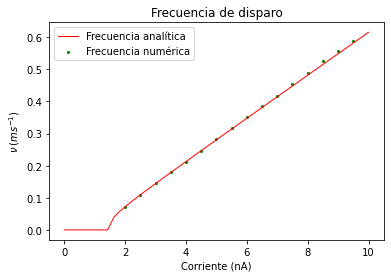

In [24]:
I=np.linspace(0,10,50)
def nu(I):
    V_um=-50.0
    E_l=-65.0
    R_m=10.0
    V0=-65.0
    tau=10.0
    if I<=1.5:
        return 0.0
    else: 
        return 1.0/(tau*np.log((V0-E_l-R_m*I)/(V_um-E_l-R_m*I)))
#plt.plot(I,nu(I),label="Frecuencia analítica",color='red',linestyle='solid',linewidth=1)
I_num=np.arange(2.0,10.0,0.5)
#I=np.linspace(1.7,10.0,100)
plt.title("Frecuencia de disparo")
plt.xlabel("Corriente (nA)")
plt.ylabel(r'$\nu\:(ms^{-1})$')
plt.scatter(I_num,nu_num,label="Frecuencia numérica",color="green",marker=".",linewidth=0.1)      
plt.plot(I,np.vectorize(nu)(I),label="Frecuencia analítica",color='red',linestyle='solid',linewidth=1)
plt.legend()
plt.savefig("frecuencia_disparo.pdf")
plt.show()

Observamos que la frecuencia sigue un régimen lineal en funcion de la corriente

I. Repetir el punto F pero con una corriente $I_e(t)=0.35\cdot(\cos(\frac{t}{3})+\sin(\frac{t}{5})+\cos(\frac{t}{7})+\sin(\frac{t}{11})+\cos(\frac{t}{13}))^2\:nA$

In [25]:
m=rk4
V0=[-65]
a=0.0
b=200.0
#h=0.05 entonces k=200/0.05=4000
k=4000
p=0.0

def dV(V,t,p):
    tau=10.0
    El=-65.0
    Rm=10.0
    Ie=0.35*(np.cos(t/3.0)+np.sin(t/5.0)+np.cos(t/7.0)+np.sin(t/11.0)+np.cos(t/13.0))**2
    #RmIe=20000.0
    return (El-V+Rm*Ie)/tau

t_aprox, V_aprox = integrador_ode_disparo(m,dV,V0,a,b,k,p)

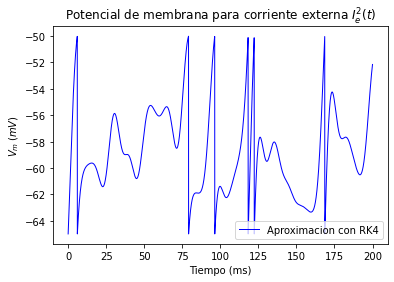

In [26]:
plt.title("Potencial de membrana para corriente externa $I_e^2(t)$")
plt.xlabel("Tiempo (ms)")
plt.ylabel(r'$V_m\:(mV)$')
plt.plot(t_aprox,V_aprox[0],label="Aproximacion con RK4",color="blue",linestyle="-",linewidth=1)
plt.legend()
plt.savefig("disparo_Ie2.pdf")
plt.show()